<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day24_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
print('Setup complete')

Setup complete


In [ ]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y =  iris.target

print(f"{x.shape[0]} samples, {x.shape[1]} features")
print(f"Features: {iris.feature_names}")
print(f"Target: {iris.target_names}")

150 samples, 4 features
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: ['setosa' 'versicolor' 'virginica']


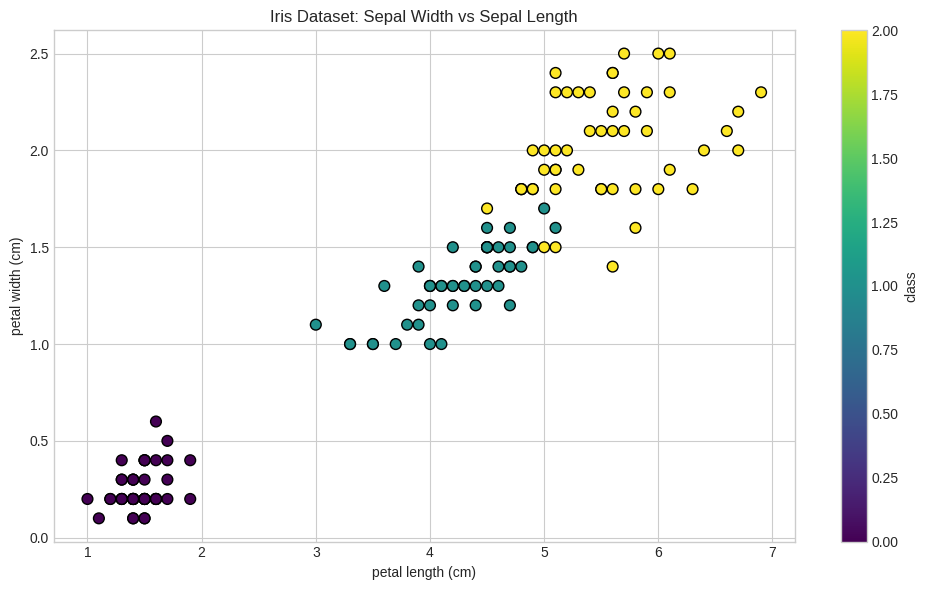

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x.iloc[:, 2], x.iloc[:, 3], c=y, cmap='viridis', edgecolor='black', s=60)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_title('Iris Dataset: Sepal Width vs Sepal Length')
plt.colorbar(scatter, label='class')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f"Train: {len(x_train)}, Test {len(x_test)}")

Train: 120, Test 30


In [ ]:
# A Basic KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

print(f"Train Score: {knn.score(x_train_scaled, y_train)}")
print(f"Test Score: {knn.score(x_test_scaled, y_test)}")

Train Score: 0.975
Test Score: 0.9333333333333333


Choosing K

Best K by test accuracy: 1


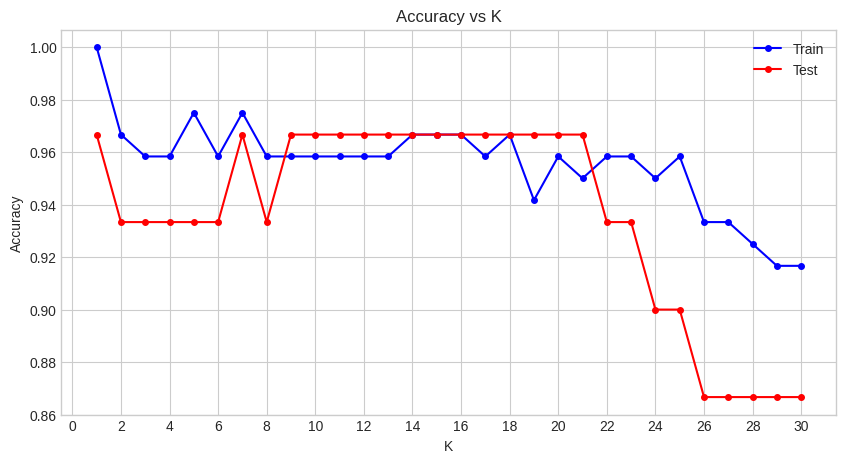

In [ ]:
# K too small = overfitting (sensitive to noise)
# K too large = underfitting (too smooth)

k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scaled, y_train)
  train_scores.append(knn.score(x_train_scaled, y_train))
  test_scores.append(knn.score(x_test_scaled, y_test))

plt.figure(figsize=(10, 5))
plt.plot(k_range, train_scores, 'b-o', label='Train', markersize=4)
plt.plot(k_range, test_scores, 'r-o', label='Test', markersize=4)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.xticks(range(0, 31, 2))

best_k = k_range[np.argmax(test_scores)]
print(f"Best K by test accuracy: {best_k}")

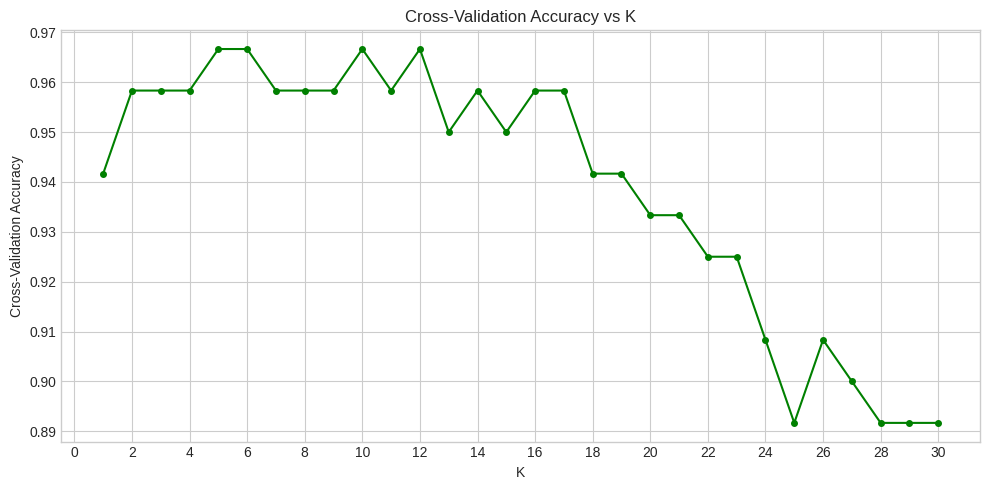

Best K by cross-validation accuracy: 5


In [ ]:
#using cross-validation for a better K selection
cv_scores  = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train_scaled, y_train, cv=5)
  cv_scores.append(scores.mean())

plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, 'g-o', markersize=4)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs K')
plt.xticks(range(0, 31, 2))
plt.tight_layout()
plt.show()

best_k_cv = k_range[np.argmax(cv_scores)]
print(f"Best K by cross-validation accuracy: {best_k_cv}")

In [ ]:
print("Distance Metrics:")
print("-" * 50)
print("Euclidean: √Σ(xᵢ - yᵢ)² — straight line distance")
print("Manhattan: Σ|xᵢ - yᵢ| — city block distance")
print("Minkowski: (Σ|xᵢ - yᵢ|^p)^(1/p) — generalized")
print("  p=1 → Manhattan")
print("  p=2 → Euclidean")

Distance Metrics:
--------------------------------------------------
Euclidean: √Σ(xᵢ - yᵢ)² — straight line distance
Manhattan: Σ|xᵢ - yᵢ| — city block distance
Minkowski: (Σ|xᵢ - yᵢ|^p)^(1/p) — generalized
  p=1 → Manhattan
  p=2 → Euclidean


In [ ]:
#comparing the metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

print(f"{'Metric':<15} {'Train Acc':<12} {'Test Acc':<12}")

for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
  knn.fit(x_train_scaled, y_train)
  print(f"{metric:<15} {knn.score(x_train_scaled, y_train):<12.4f}"
        f"{knn.score(x_test_scaled, y_test):<12.4f}")

Metric          Train Acc    Test Acc    
euclidean       0.9583      0.9333      
manhattan       0.9583      0.9667      
chebyshev       0.9500      0.9333      
minkowski       0.9583      0.9333      


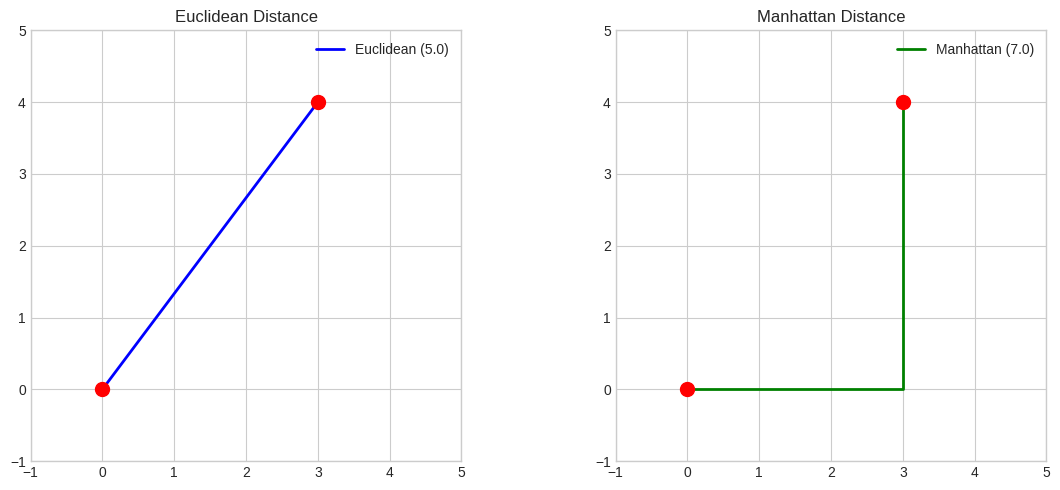

In [ ]:
# Visualize distance metrics
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Two points
p1, p2 = np.array([0, 0]), np.array([3, 4])

# Euclidean
axes[0].plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-', linewidth=2, label='Euclidean (5.0)')
axes[0].scatter([p1[0], p2[0]], [p1[1], p2[1]], s=100, c='red', zorder=5)
axes[0].set_title('Euclidean Distance')
axes[0].set_xlim(-1, 5)
axes[0].set_ylim(-1, 5)
axes[0].legend()
axes[0].set_aspect('equal')

# Manhattan
axes[1].plot([p1[0], p2[0], p2[0]], [p1[1], p1[1], p2[1]], 'g-', linewidth=2, label='Manhattan (7.0)')
axes[1].scatter([p1[0], p2[0]], [p1[1], p2[1]], s=100, c='red', zorder=5)
axes[1].set_title('Manhattan Distance')
axes[1].set_xlim(-1, 5)
axes[1].set_ylim(-1, 5)
axes[1].legend()
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

Weighted KNN

In [ ]:
# uniform: all k neighbors vote equally
# Distance: closer nieghbors have more weight

knn_uniform = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=10, weights='distance')

knn_uniform.fit(x_train_scaled, y_train)
knn_distance.fit(x_train_scaled, y_train)

print(f"Uniform weights: {knn_uniform.score(x_test_scaled, y_test)}")
print(f"Distance weights: {knn_distance.score(x_test_scaled, y_test)}")

Uniform weights: 0.9666666666666667
Distance weights: 1.0


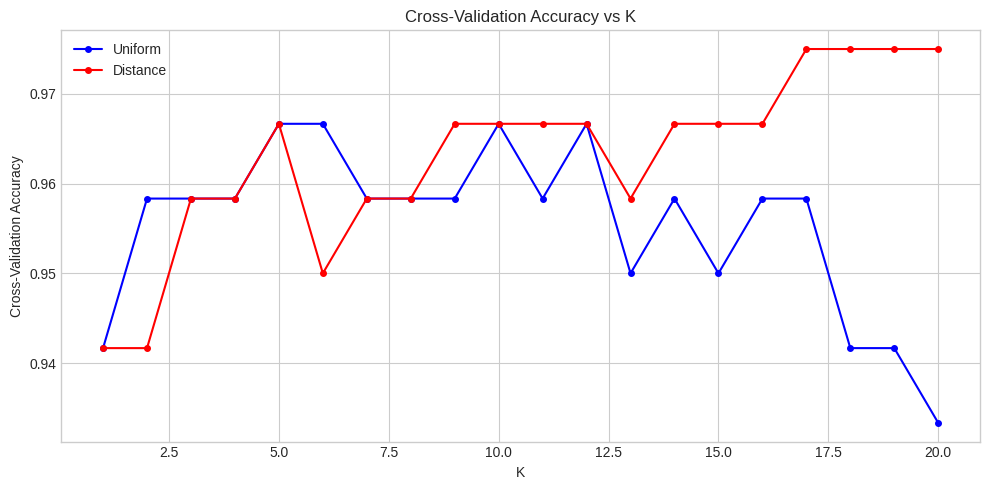

In [ ]:
#Compare across K values
k_range = range(1, 21)
uniform_scores = []
distance_scores = []

for k in k_range:
  knn_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
  knn_d = KNeighborsClassifier(n_neighbors=k, weights='distance')

  uniform_scores.append(cross_val_score(knn_u, x_train_scaled, y_train, cv=5).mean())
  distance_scores.append(cross_val_score(knn_d, x_train_scaled, y_train, cv=5).mean())

plt.figure(figsize=(10, 5))
plt.plot(k_range, uniform_scores, 'b-o', label='Uniform', markersize=4)
plt.plot(k_range, distance_scores, 'r-o', label='Distance', markersize=4)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs K')
plt.legend()
plt.tight_layout()
plt.show()

Decision Boundary Visualization

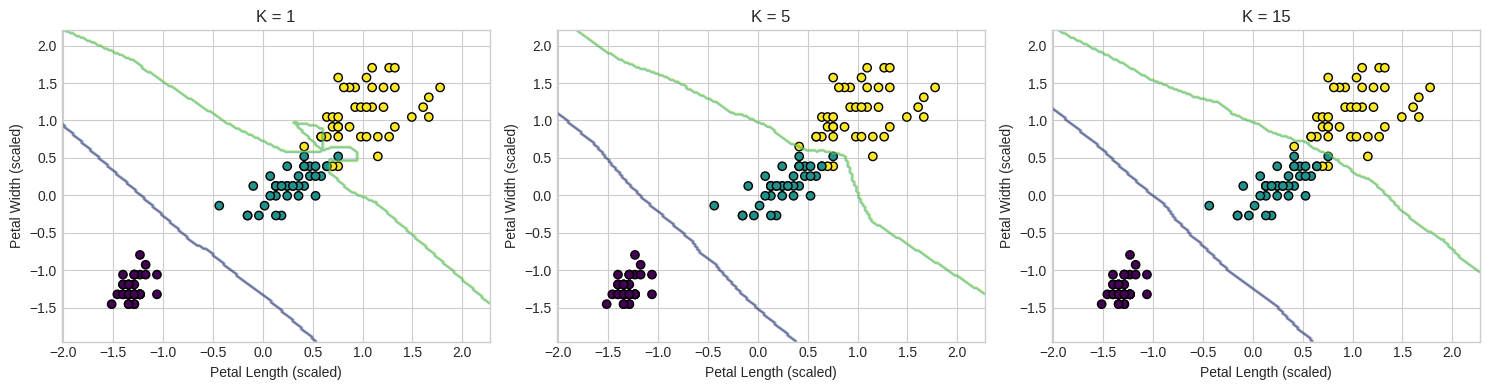

In [ ]:
# Use 2 features for visualization
x_2d = x_train_scaled[:, 2:4]
x_2d_test = x_test_scaled[:, 2:4]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, k in zip(axes, [1, 5, 15]):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_2d, y_train)

  #Decision Boundary
  xx, yy = np.meshgrid(np.linspace(x_2d[:, 0].min()-0.5, x_2d[:, 0].max()+0.5, 200),
                       np.linspace(x_2d[:, 1].min()-0.5, x_2d[:, 1].max()+0.5, 200))
  z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  ax.contour(xx, yy, z, alpha=0.3, cmap='viridis')
  ax.scatter(x_2d[:, 0], x_2d[:, 1], c=y_train, cmap='viridis', edgecolor='black')
  ax.set_title(f'K = {k}')
  ax.set_xlabel('Petal Length (scaled)')
  ax.set_ylabel('Petal Width (scaled)')

plt.tight_layout()
plt.show()